# **Set Up the Environment**

In [ ]:
#import libraries
import nltk
nltk.download('punkt_tab')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Data collection**

In [ ]:
#loading our dataset
data = pd.read_csv("spam-ham_data.csv")

# **Know Our Data : EDA**



1.   Dataset information
2.   Data visualisation




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8175 entries, 0 to 8174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8175 non-null   object
 1   label   8175 non-null   object
dtypes: object(2)
memory usage: 127.9+ KB


In [ ]:
data.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam


In [ ]:
data['label'].value_counts()

,count
label,
spam,4125
not_spam,4050


In [ ]:
data.isnull().sum()

,0
text,0
label,0


<ipython-input-7-d3bc69ea3f54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=data, palette='hls')


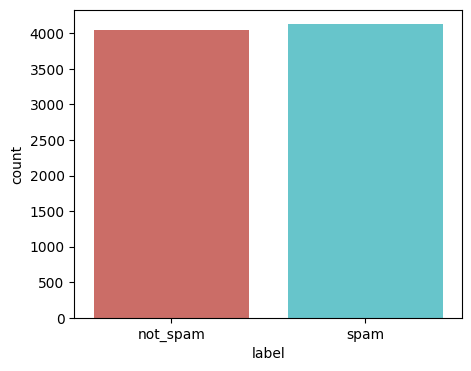

In [ ]:
#vizualise the data
plt.figure(figsize=(5,4))
sns.countplot(x='label',data=data, palette='hls')
plt.show()

# **2- Data Pre_precessing**


1.   data cleaning : null-values duplicate values
2.   Transform (encoding)
3.   Split the data into train and test



In [ ]:
#duplicate value
data.duplicated().sum()

133

In [ ]:
#remove duplicated value
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(8042, 2)

In [ ]:
data['label'].value_counts()


,count
label,
spam,4125
not_spam,3917


In [ ]:
data.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam



**Using** the label_encoder (transformer) to encode the target column

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['label'] = LabelEncoder().fit_transform(data['label'])

In [ ]:
data.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,0
1,"""Get rich quick! Make millions in just days wi...",1
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1
3,[Google AI Blog: Contributing Data to Deepfake...,0
4,Trying to see if anyone already has timestamps...,0


# **Data visualisation**
Chart - 1 : Distribution of Spam vs Not spam

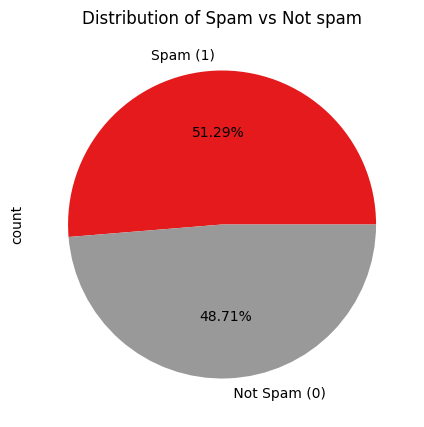

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Not spam Messages
spread = data['label'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels explicitly
labels = ['Spam (1)', ' Not Spam (0)']

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%',labels=labels, cmap='Set1')
plt.title(f'Distribution of Spam vs Not spam')

# Display the Chart
plt.show()


From the pie chart, we observed that the dataset contains 51.29% spam messages and 48.71% not spam messages. This indicates that the two categories are nearly balanced, which is advantageous for training machine learning models.

<ipython-input-18-0523b596c8e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


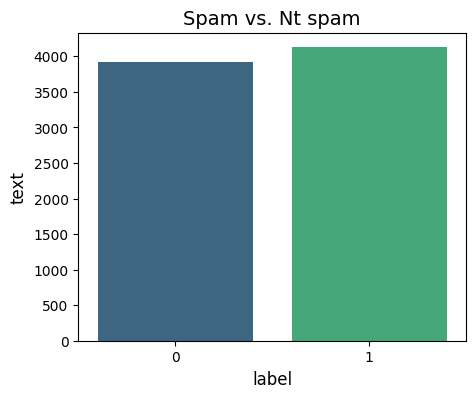

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Spam vs. Nt spam', fontsize=14)
plt.ylabel('text', fontsize=12)
plt.xlabel('label', fontsize=12)
plt.show()

#**Text Pre_processing**

In [ ]:
# clening the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [ ]:
# Apply the cleaning function to the text column
nltk.download('stopwords')
data['cleaned_text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,label,cleaned_text
0,hey I am looking for Xray baggage datasets can...,0,hey look xray baggag dataset provid
1,"""Get rich quick! Make millions in just days wi...",1,get rich quick make million day new revolution...
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1,urgent messag believ offer hey yeah eye read r...
3,[Google AI Blog: Contributing Data to Deepfake...,0,googl ai blog contribut data deepfak detect re...
4,Trying to see if anyone already has timestamps...,0,tri see anyon alreadi timestamp key event happ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
message = vectorizer.fit_transform(data['cleaned_text'])

message.shape

(8042, 13787)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(message, data['label'], test_size=0.2, random_state=42)

# **Model selection**

## 1. **MultinomialNB**

In [ ]:
#model 1
model_NB = MultinomialNB()
# Model training
model_NB.fit(X_train, y_train)
# Model predictions on test set
y_pred = model_NB.predict(X_test)


### **Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, recall_score
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100



99.7513983840895

**Cross-validation**

In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(model_NB, message, data['label'], cv=5)
# Print the mean score
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.99378496 0.99751398 1.         1.         0.99875622]
Average cross-validation score: 0.9980110324697211


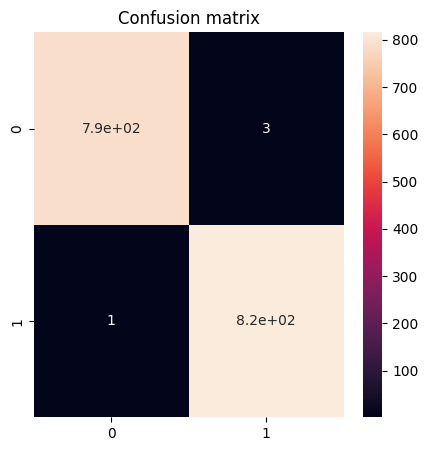

In [ ]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       792
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609



## **2. Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear')  # Linear kernel is commonly used for text classification
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9937849596022374


## **3. Decision tree**


### Grid search for hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ds_tree_params = {
    'max_depth': [3, 5, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
}

ds_tree = DecisionTreeClassifier()

search = GridSearchCV(ds_tree, ds_tree_params, cv=5)
search.fit(X_train, y_train)

print(search.best_params_)
print(search.best_score_)

{'criterion': 'entropy', 'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.9827453866334114


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Training model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

ds_tree = DecisionTreeClassifier(max_depth=70, min_samples_split=7, min_samples_leaf=1, criterion = "entropy")
ds_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=70, min_samples_split=7)

### Model Evaluation

In [ ]:
y_pred = ds_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

97.94903666873834

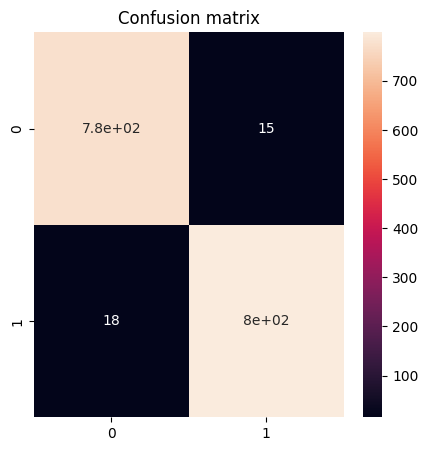

In [ ]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       792
           1       0.98      0.98      0.98       817

    accuracy                           0.98      1609
   macro avg       0.98      0.98      0.98      1609
weighted avg       0.98      0.98      0.98      1609



## **4. Logitsic Regression**



### Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lg_params = {
    'penalty':['l1','l2','none'],
    'C' : np.logspace(0,4,10),
    'solver': ['lbfgs','newton-cg','sag','saga'],
    # 'max_iter'  : [1000, 2500, 5000]
}

lg = LogisticRegression()

search_lg = GridSearchCV(lg, param_grid =lg_params, cv=5, n_jobs=-1, scoring='accuracy')
search_lg.fit(X_train, y_train)


print(search_lg.best_params_)
print(search_lg.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
350 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

{'C': 166.8100537200059, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9975125099541897


### Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C=166.8100537200059, penalty='l2', solver='newton-cg')
lg.fit(X_train, y_train)

LogisticRegression(C=166.8100537200059, solver='newton-cg')

### Model Evaluation

In [ ]:
y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.37849596022374

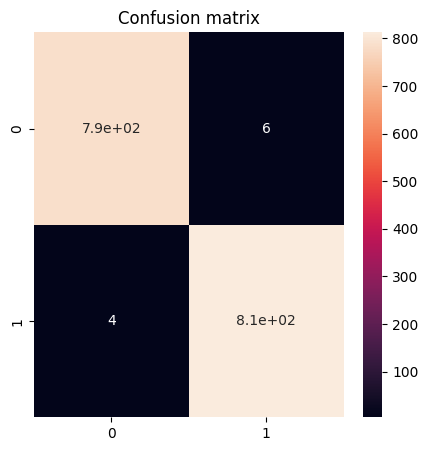

In [ ]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       792
           1       0.99      1.00      0.99       817

    accuracy                           0.99      1609
   macro avg       0.99      0.99      0.99      1609
weighted avg       0.99      0.99      0.99      1609



# **Saving Model**

In [ ]:
import pickle

with open('Spam-Detection-Model.pkl', 'wb') as model_file:
    pickle.dump(model_NB, model_file)

with open('Spam-Detection-Vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [ ]:
import pickle

with open('Spam-Detection-Model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('Spam-Detection-Vectorizer.pkl', 'rb') as model_file:
    loaded_vectorizer = pickle.load(model_file)

messages = [
    "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
    "Even my brother is not like to speak with me. They treat me like aids patent.",
    "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030",
    "I HAVE A DATE ON SUNDAY WITH WILL!!",
    "You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+)	",
    "You've Won, send your credit card info to get your Prize!!"
]

cleaned_messages = [clean_text(message) for message in messages]

msg_tfidf = loaded_vectorizer.transform(cleaned_messages)

predictions = model_NB.predict(msg_tfidf)

for comment, prediction in zip(messages, predictions):
    label = "Spam" if prediction == 1 else "Non-Spam"
    print(f"Comment: {comment}")
    print(f"Predicted: {label}")
    print()

cleaned_messages


Comment: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Predicted: Non-Spam

Comment: Even my brother is not like to speak with me. They treat me like aids patent.
Predicted: Spam

Comment: Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
Predicted: Non-Spam

Comment: I HAVE A DATE ON SUNDAY WITH WILL!!
Predicted: Non-Spam

Comment: You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+)	
Predicted: Non-Spam

Comment: You've Won, send your credit card info to get your Prize!!
Predicted: Spam



['freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'date sunday',
 'winner u special select receiv holiday flight inc speak live oper claim p min',
 'send credit card info get prize']